<a href="https://colab.research.google.com/github/adalves-ufabc/2021.QS-PLN/blob/main/2021_Q1_PLN_Notebook_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2021.Q1]**
Prof. Alexandre Donizeti Alves

### **Modelagem de Tópicos**

Em geral, podemos assumir que textos que tratam de um mesmo assunto usam um vocabulário de palavras similares, e que textos que tratam de assuntos diferentes compartilham um número menor de palavras entre si. Além disso, podemos também assumir que documentos tratam de poucos tópicos. A **Modelagem de Tópicos** visa agrupar documentos em tópicos a partir das palavras contidas nesses documentos. Além disso, ao contrário da classificação de documentos, o conjunto de tópicos não é conhecido de antemão.


A **Modelagem de Tópicos** em PLN é uma técnica que visa analisar documentos automaticamente para determinar grupos de palavras para grupos de documentos. Ela é conhecida como uma tarefa de aprendizado não supervisionado pois, ao contrário da classificação de documentos, os documentos não precisam ser previamente classificados por humanos no conjunto de treinamento. Entretanto, a análise dos tópicos encontrados depende de uma inspeção criteriosa, pois os tópicos encontrados nem sempre podem ser mapeados para algum conceito que faça sentido para quem está analisando os documentos, e pode ser necessário refazer o processo ou descartar alguns tópicos para se encontrar resultados úteis.

Por exemplo, no monitoramento de mídias sociais, se você estiver interessado em classificar comentários de usuários de acordo com o sentimento (positivo, negativo ou neutro), o processo é de **Classificação de Documentos**. Em contrapartida, se quiser saber quais os assuntos que são mais comentados pelos usuários, você pode usar **Modelagem de Tópicos**. 
>
Outro exemplo consiste na análise de notícias publicadas em um portal Web. Na **Classificação de Documentos**, o objetivo é classificar essas notícias em categorias pré-determinadas (esportes, política, economia etc.). Já na **Modelagem de Tópicos**, queremos encontrar quais assuntos principais essas notícias estão relacionadas, sem restringir a priori quais são as categorias principais. 

>
Em resumo, com a **Modelagem de Tópicos** queremos encontrar coleções de palavras que estão relacionadas entre si (e que de acordo com a nossa suposição, estão relacionadas a um tópico específico), e cabe ao usuário analisar essa coleção de palavras e avaliar a que se refere essa coleção de palavras. 

Informalmente, o processo de **Modelagem de Tópicos** se refere ao processo de criação, a partir de um corpus, de:

- Uma lista de tópicos, definidas por um conjunto de termos que coocorrem nos documentos daquele corpus, e;
- Grupos de documentos de acordo com o(s) tópico(s) que eles pertencem.

A suposição que definimos informalmente acima pode ser formalizada assumindo que cada documento compreende, estatisticamente, uma mistura de tópicos, isto é, uma distribuição estatística que corresponde à "adição" de distribuições de probabilidade de palavras sobre todos os tópicos cobertos. O processo de **Modelagem de Tópicos** tenta encontrar quais tópicos estão presentes em um documento do corpus e o quão forte é essa presença.

Vamos analisar os pontos mais importantes, bem como exemplos computacionais, de `dois métodos` para **Modelagem de Tópicos**: 

- **Análise Semântica Latente** (LSA - *Latent Semantic Analysis*)
- **Alocação Latente de Dirichlet** (LDA - *Latent Dirichlet Allocation*)

>
O termo `"latente"` (escondido) em ambos os métodos implica que não sabemos, a priori, como termos e documentos estão organizados em tópicos, mas acreditamos que eles existem e podem ser encontrados a partir de algum critério. 


### **Análise Semântica Latente (LSA)**

A **Análise Semântica Latente** é baseada no que é conhecido como **hipótese distribucional**, que afirma que a semântica das palavras pode ser inferida observando o contexto em que elas aparecem. Em outras palavras, sob essa hipótese, a semântica de duas palavras será similar se elas ocorrem em contextos similares.

>
Dessa maneira, **LSA** computa quão frequentemente palavras ocorrem nos documentos – e em todo o corpus – e assume que documentos similares conterão, aproximadamente, a mesma distribuição de frequência para algumas palavras. Nesse caso, a informação sintática (por exemplo, a ordem das palavras) e a informação semântica (por exemplo, a polissêmia – pluraridade de sentido de uma dada palavra - muitos significados) são ignoradas, e cada documento é tratado como uma "sacola de palavras", assim como fazemos na matriz termo-documento. Em geral, usa-se a contagem **TF-IDF** para calcular a matriz termo-documento.

Uma vez que a matriz termo-documento é calculada, aplicamos a decomposição em valores singulares, uma técnica de decomposição de matrizes muito usada em álgebra linear. Essa decomposição tem diversas aplicações importantes em diferentes áreas, como processamento de sinais e estatística. Essa decomposição fatora a matriz termo-documento em três matrizes:

>  $A = U*\Sigma*V^T$

A matriz $U$ é conhecida como matriz documento-tópico, a matriz $V$ é conhecida como matriz termo-tópico. A matriz $\Sigma$ é uma matriz diagonal, e os valores $\sigma_i$ correspondem aos **valores singulares** de $A$. Esses valores singulares indicam as direções de maior variabilidade, considerando o espaço da matriz termo-documento. O número de tópicos que desejamos gerar pode ser selecionado usando as $k$ colunas e linhas das matrizes documento-tópico e termo-tópico correspondentes aos $k$ valores maiores de $\Sigma$. Esse processo é representado esquematicamente na figura a seguir:


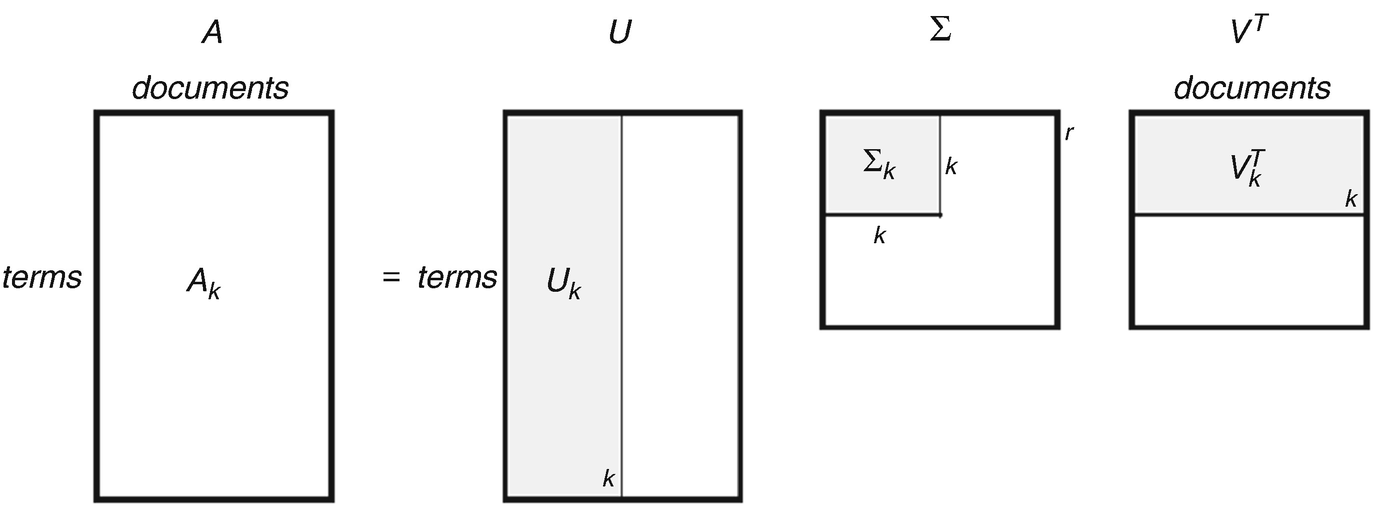



No exemplo a seguir, vamos usar o pacote `gensim` para criar tópicos a partir da letra das músicas mais populares de 1965 até 2015, mantida pela *BillBoard*. Os detalhes do processo de scrapping estão descritos [aqui](https://github.com/zhao1701/spotify-song-lyric-analysis).

In [33]:
# importar as bibliotecas
import pandas as pd
import numpy as np

In [34]:
# carregar o dataset
songs = pd.read_csv("/content/billboard-lyrics-spotify.csv")
songs.head()

,artist_all,artist_base,rank,song,year,artist_featured,song_clean,artist_clean,lyrics,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,time_signature,valence,duration_min,num_words,words_per_sec,num_uniq_words,decade,uniq_ratio
0,percy faith,percy faith,1,theme from a summer place,1960,NaN,theme from a summer place,percy faith,theres a summer place where it may rain or sto...,0.631,0.466,0.3890,0.0,0.843000,5.0,0.295,-12.825,1.0,49.0,1953,0.0253,92.631,4.0,0.749,2.414883,104.0,0.717771,58.0,1960,1.793103
1,jim reeves,jim reeves,2,he'll have to go,1960,NaN,hell have to go,jim reeves,put your sweet lips a little closer to the pho...,0.909,0.554,0.1860,0.0,0.001440,1.0,0.110,-15.846,1.0,53.0,1997-02-14,0.0379,81.181,3.0,0.200,2.310667,152.0,1.096365,69.0,1960,2.202899
2,the everly brothers,the everly brothers,3,cathy's clown,1960,NaN,cathys clown,the everly brothers,dont want your love any more dont want your k...,0.412,0.498,0.5820,0.0,0.000000,7.0,0.372,-8.961,1.0,50.0,1962-06-01,0.0339,119.809,4.0,0.866,2.400217,121.0,0.840202,64.0,1960,1.890625
3,johnny preston,johnny preston,4,running bear,1960,NaN,running bear,johnny preston,on the bank of the river stood running bear yo...,0.854,0.772,0.2970,0.0,0.000008,5.0,0.125,-14.679,0.0,40.0,2013-09-01,0.0530,119.987,4.0,0.822,2.636667,220.0,1.390645,89.0,1960,2.471910
4,mark dinning,mark dinning,5,teen angel,1960,NaN,teen angel,mark dinning,teen angel teen angel teen angel that fateful ...,0.936,0.570,0.0636,0.0,0.000000,0.0,0.122,-18.548,1.0,18.0,2005,0.0459,101.517,4.0,0.282,2.664883,109.0,0.681706,73.0,1960,1.493151


In [35]:
songs.shape

(5566, 30)

In [36]:
# remover musicas sem letras
songs.dropna(subset = ["lyrics"], inplace=True)

In [37]:
# remover musicas com letras em branco
songs.drop(songs.index[np.where(songs.lyrics.str.isspace())],inplace=True)

In [38]:
import nltk

# baixar modelos e dicionarios
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
# pre-processamento de textos

from nltk.tokenize import wordpunct_tokenize

# lista de stopwords 
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

# stemmer
from nltk.stem.porter import PorterStemmer
stm = PorterStemmer()

# lematizador
from nltk.stem.wordnet import WordNetLemmatizer
wnl = WordNetLemmatizer()

# pontuacao
import string

def preproc_tokenizer(text, reduc='stemmer'):
    
    # quebra o documento em  tokens
    words = wordpunct_tokenize(text) 
    
    # converte palavras para minusculo
    words = [word.lower() for word in words]
    
    # remove as stopwords
    words = [word for word in words if word not in stopwords]
    
    # remove pontuacao
    words = [word for word in words if word not in string.punctuation]
    
    if reduc == 'lemmatizer':
        words = [wnl.lemmatize(word) for word in words] 
    else:
        words = [stm.stem(word) for word in words]

    return(words)

In [41]:
# aplicar o pre-processamento nas letras das musicas

lyrics = [preproc_tokenizer(lyric) for lyric in songs.lyrics]

In [42]:
# prepara o corpus e a lista de tokens (dicionario)
from collections import defaultdict
from gensim import corpora

# conta a frequencia de cada token
frequency = defaultdict(int)
for text in lyrics:
    for token in text:
        frequency[token] += 1
        
# remove palavras que aparecem apenas uma unica vez
lyrics = [
    [token for token in lyric if frequency[token] > 1]
    for lyric in lyrics
]

# prepara o corpus e a lista de tokens (dicionario)
dictionary = corpora.Dictionary(lyrics)
corpus = [dictionary.doc2bow(lyric) for lyric in lyrics]

In [43]:
# cria o modelo LSA (no gensim, é chamado de LSI-Latent Semant Indexing)
from gensim import models

# passo 1 -- inicializa o modelo TF-IDF
tfidf = models.TfidfModel(corpus)  

# passo 2 -- cria a matriz termo-documento
corpus_tfidf = tfidf[corpus] 

# inicializa o modelo LSI - vamos criar 2 topicos para fins de visualização
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)  

# aplica a transformacao no corpus
corpus_lsi = lsi_model[corpus_tfidf]  

In [44]:
""" 
Imprime a equação dos tópicos. A equação é formada por termos e pesos. 
O termo corresponde à frequência daquela palavra (tf-idf) no documento.
O peso é um número que corresponde ao peso daquela palavra no tópico.
"""

lsi_model.print_topics()

[(0,
  '0.186*"love" + 0.174*"babi" + 0.153*"oh" + 0.129*"dont" + 0.123*"want" + 0.118*"im" + 0.115*"your" + 0.111*"girl" + 0.109*"yeah" + 0.108*"let"'),
 (1,
  '0.973*"la" + 0.128*"na" + 0.093*"da" + 0.044*"sha" + 0.038*"ooh" + 0.037*"danc" + -0.026*"love" + 0.025*"tonight" + 0.023*"hey" + -0.023*"ill"')]

In [45]:
# para analisar esses topicos vamos transforma-los em um DataFrame

import numpy as np

topics = pd.DataFrame([[t1, t2] for (_,t1),(_,t2) in corpus_lsi],columns=["Topic1","Topic2"])

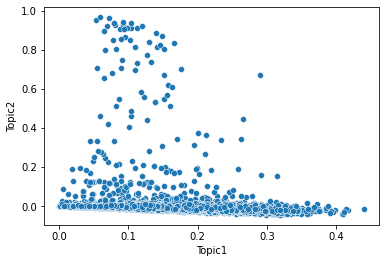

In [47]:
import seaborn as sns

sns.scatterplot(x="Topic1", y="Topic2", data= topics);

Como pode ser visto, a maioria das músicas ficou alocada em um dos tópicos. 
>
Podemos combinar esses tópicos com os outros atributos de áudio da base para tentar ganhar algum *insight*. A descrição dos atributos está [aqui](https://github.com/zhao1701/spotify-song-lyric-analysis#analysis-of-audio-features).

In [48]:
songs["Topic1"] = topics["Topic1"]
songs["Topic2"] = topics["Topic2"]

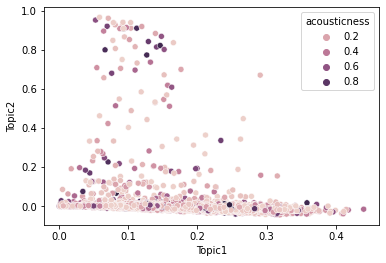

In [49]:
sns.scatterplot(x="Topic1", y="Topic2", hue="acousticness" ,data= songs);

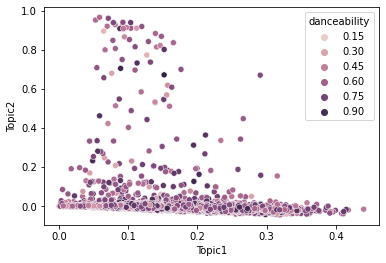

In [50]:
sns.scatterplot(x="Topic1", y="Topic2", hue="danceability" ,data= songs);

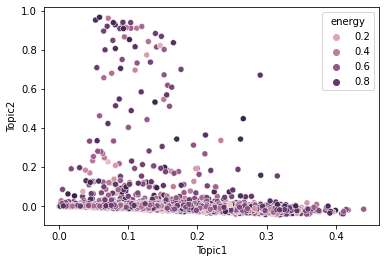

In [51]:
sns.scatterplot(x="Topic1", y="Topic2", hue="energy" ,data= songs);

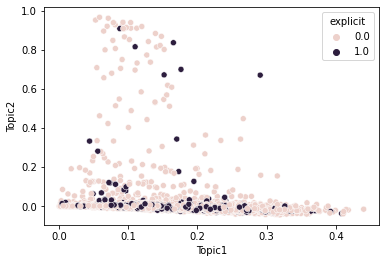

In [52]:
sns.scatterplot(x="Topic1", y="Topic2", hue="explicit" ,data= songs);

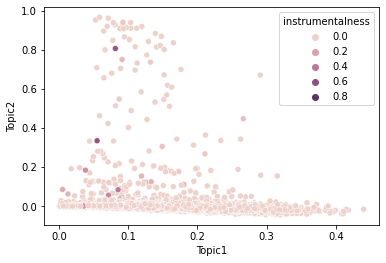

In [53]:
sns.scatterplot(x="Topic1", y="Topic2", hue="instrumentalness" ,data= songs);

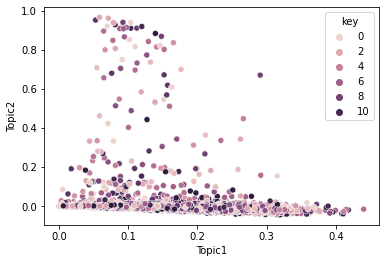

In [54]:
sns.scatterplot(x="Topic1", y="Topic2", hue="key" ,data= songs);

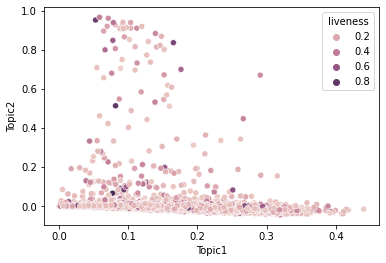

In [55]:
sns.scatterplot(x="Topic1", y="Topic2", hue="liveness" ,data= songs);

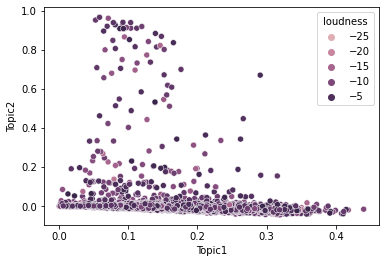

In [56]:
sns.scatterplot(x="Topic1", y="Topic2", hue="loudness" ,data= songs);

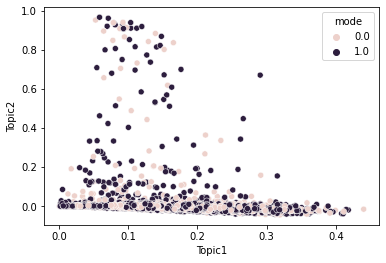

In [57]:
sns.scatterplot(x="Topic1", y="Topic2", hue="mode" ,data= songs);

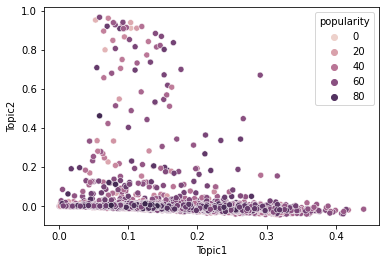

In [58]:
sns.scatterplot(x="Topic1", y="Topic2", hue="popularity" ,data= songs);

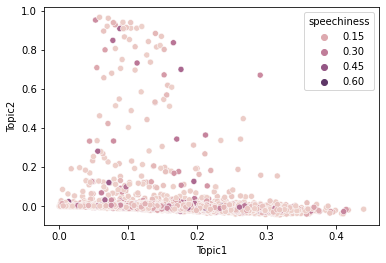

In [59]:
sns.scatterplot(x="Topic1", y="Topic2", hue="speechiness" ,data= songs);

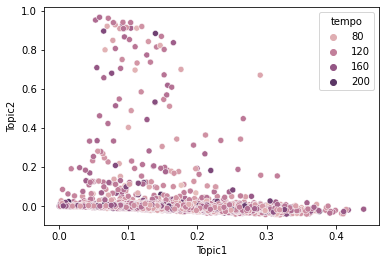

In [60]:
sns.scatterplot(x="Topic1", y="Topic2", hue="tempo" ,data= songs);

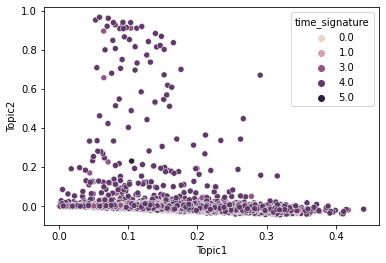

In [61]:
sns.scatterplot(x="Topic1", y="Topic2", hue="time_signature" ,data= songs);

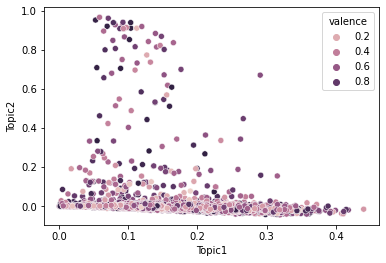

In [62]:
sns.scatterplot(x="Topic1", y="Topic2", hue="valence" ,data= songs);

A maiora dos atributos de áudio não tem correlação com os tópicos, mas podemos observar que o tópico 2 não tem palavras explícitas (*explicity*) nem verbosidade (*speechiness*).

### **Alocação Latente de Dirichlet (LDA)**

A **LDA** é baseada nas mesmas subposições que suportam a LSA: a hipótese distribucional de que tópicos similares usam palavras similares e da distribuição estatística de que documentos versam sobre diferentes tópicos para os quais uma distribuição estatística pode ser determinada. 
>
O objetivo também é o mesmo: mapear cada documento do corpus a um conjunto de tópicos, que cobre a maioria das palavras do documento. Além disso, a **LDA** também é aplicada sobre a matriz termo-documento, que faz uso de uma "sacola de palavras" e ignora a informação sintática e polissêmica dos termos. A polissemia é a propriedade que uma palavra tem de apresentar vários sentidos (muitos significados).


Entretanto, em **LDA**, o mapeamento de tópicos assume que a distribuição de tópicos em um documento e a distribuição de palavras em tópicos seguem uma distribuição de Dirichlet. Em contrapartida, a LSA não assume nenhuma distribuição, o que torna o seu resultado mais difícil de interpretar. 

A distribuição de Dirichlet é uma "distribuição de distribuições". Para ter um *insight* sobre essa distribuição, considere a seguinte analogia: imagine uma empresa que conduza um sorteio eletrônico em que o um apostador escolhe três números para apostar. A empresa pode fazer tanto um sorteio idôneo, em que cada número tem iguais chances de ser sorteado, até um sorteio completamente enviesado, em que o "sorteio" é predeterminado, e uma trinca preestabelecida será sorteada, e as demais combinações não podem ocorrer no sorteio. Cada um dos sorteios tem uma distribuição de probabilidade específica, mas a distribuição que governa o tipo de sorteio é uma distribuição de Dirichlet, ou seja, uma distribuição de distribuições de probabilidades sobre os sorteios (de idôneo a completamente viciado). No contexto de **Modelagem de Tópicos**, a distribuição de Dirichlet é a distribuição de tópicos em documentos e a distribuição de palavras em tópicos. 


Existem dois hiperparâmetros que controlam a similaridade de tópicos e documentos, conhecidos como $\alpha$ e $\beta$, respectivamente. Um valor baixo de $\alpha$ atribui, em média, menos tópicos a cada documento, enquanto altos valores de $\alpha$ tem o efeito oposto. Um valor baixo de $\beta$ usa menos palavras para modelar um tópico, enquanto que altos valores usarão mais palavras, o que pode tornar tópicos mais similares entre si. Um terceiro parâmetro é o número de tópicos que o algoritmo irá detectar, uma vez que LDA não determina o número de tópicos.

>
A saída do algoritmo é um vetor que contém a cobertura de cada tópico para cada documento sendo modelado. Comparados apropriadamente, esses vetores podem fornecer *insights* sobre a característica dos tópicos presente no corpus.

>
Intuitivamente, podemos imaginar que temos duas camadas de agregação. A primeira camada é a distribuição de tópicos. Ela modela a probabilidade de tópicos ocorrerem conjuntamente em um mesmo documento. A segunda camada modela a distribuição de palavras em cada tópico. 

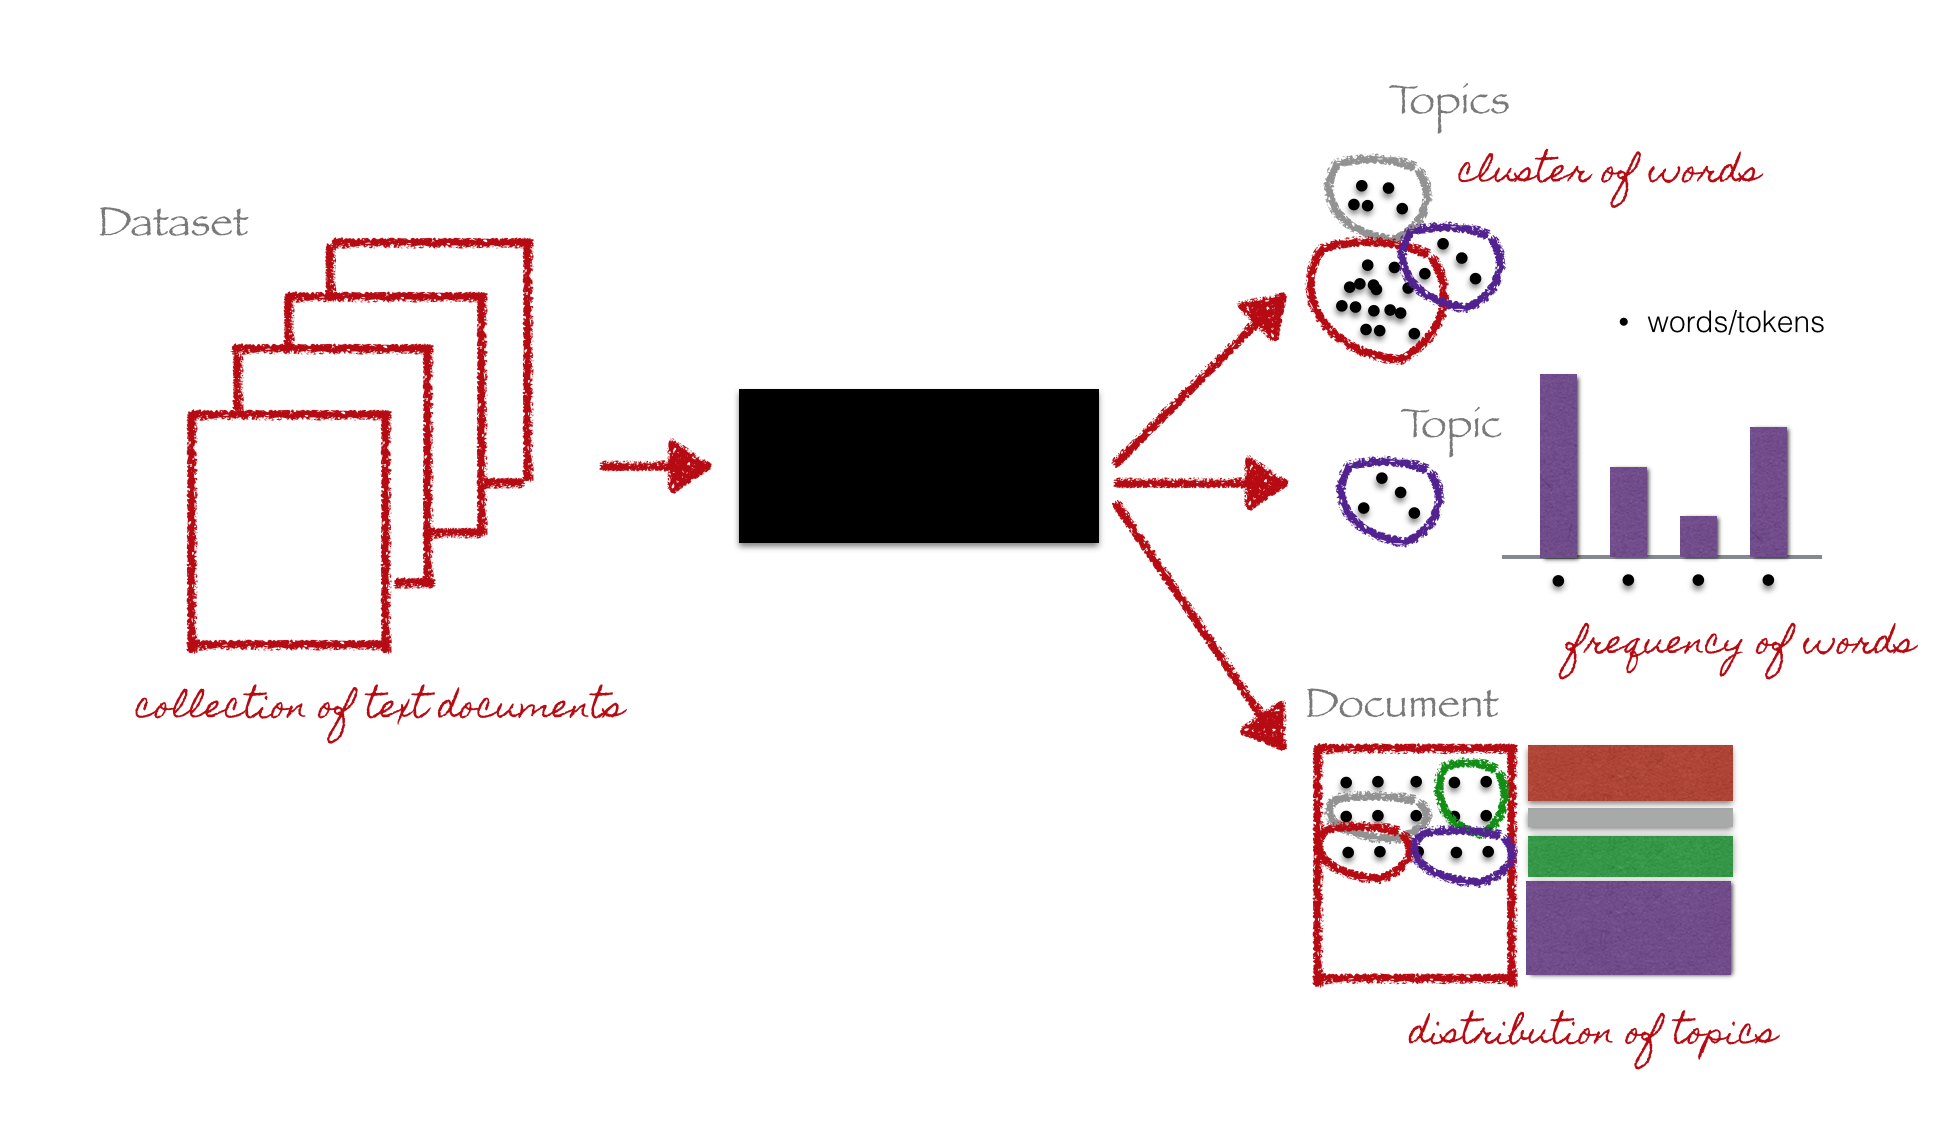



Na **LDA**, temos duas matrizes: uma matriz $\Theta$  que armazena a distribuição de probabilidades de tópicos em documentos, e outra matriz $\Phi$ que é a distribuição de palavras em tópicos. Como dito acima, ambas representam distribuições de Dirichlet. A partir dessas matrizez, podemos obter a matriz de probabilidade termo-documento a partir da multiplicação de $\Theta$ e $\Phi$. 

>
Entretanto, a partir do corpus, nós sabemos como criar a matriz termo-documento, mas não sabemos como construir as matrizes $\Theta$ e $\Phi$. O processo de derivação dessas matrizes é feito por meio de simulação, em um processo chamado de [**amostragem de Gibbs**](https://pt.wikipedia.org/wiki/Amostragem_de_Gibbs). 

>
A derivação matemática do processo é relativamente complexa, mas em linhas gerais, o processo consiste em: assuma que conhecemos as matrizes $\Theta$ e $\Phi$ (por exemplo, podemos gerá-la aleatóriamente). O processo consiste em iterativamente mudar essas matrizes para obter um resultado que maximize a verosimilhança entre o produto delas e a matriz termo-documento que obtemos a partir do corpus. Esse processo é feito palavra por palavra, ajustando a atribuição de um uma palavra a um tópico. O processo de atualização assume que não sabemos o tópico correspondente a uma palavra, mas que as outras palavras então corretas, e tentamos inferir qual o tópico será associado a uma palavra. O processo é então repetido para as demais palavras, até haja uma estabilização.


Vamos aplicar a **LDA** no nosso corpus de letras de músicas. A LDA tem uma ferramenta interesante chamada **LDAvis**, que permite explorar os tópicos e compara a frequência das palavras com relação à frequência do corpus.

In [63]:
!pip install pyLDAvis==2.1.2

In [64]:
lda_model = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=10) 
corpus_lda = lda_model[corpus_tfidf] 

import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.142659 -0.018617       1        1  79.732408
0     -0.066052  0.027360       2        1   4.968246
5     -0.050529  0.035205       3        1   3.666874
2     -0.001701 -0.057269       4        1   2.697771
9      0.048373 -0.056881       5        1   2.242652
6      0.049125  0.027971       6        1   1.980194
8      0.030532  0.000754       7        1   1.681916
3      0.018099  0.009650       8        1   1.498122
4      0.033300  0.012064       9        1   0.941760
1      0.081512  0.019762      10        1   0.590058, topic_info=       Term         Freq        Total Category  logprob  loglift
274    babi  3892.000000  3892.000000  Default  30.0000  30.0000
180      oh  4072.000000  4072.000000  Default  29.0000  29.0000
11     love  3336.000000  3336.000000  Default  28.0000  28.0000
9        im  3842.000000  3842.000000  Default  27.0000  27.0000
353     get  2799.000000  2799.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
2689  power     6.933030   221.547283  Topic10  -6.6159   1.6684
222     hey     6.931635  1867.184066  Topic10  -6.6161  -0.4634
217     day     6.850058  1613.830025  Topic10  -6.6279  -0.3294
43     hold     6.416961  1735.226790  Topic10  -6.6932  -0.4672
1167     ya     6.385891  1802.101321  Topic10  -6.6981  -0.5099

[671 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1478      1  0.857805    1
1478      2  0.003487    1
1478      3  0.003487    1
1478      4  0.003487    1
1478      5  0.038357    1
...     ...       ...  ...
2319      5  0.063512    â
2319      6  0.063512    â
2319      7  0.063512    â
2319      8  0.063512    â
2319     10  0.381072    â

[4582 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 6, 3, 10, 7, 9, 4, 5, 2])

**Referência**:

Este notebook foi criado pelo prof. **Ronaldo Prati** [UFABC], tendo sido apenas reestruturado por mim.